# House Prices  Data Exploration 

## by Abel Keya


# Investigation Overview
This investigation aims at finding out the factors that affect house price. It mainly focuses on the varying house prices with factors such as location, size in square feet,style and years 

# What is the structure of your dataset?
> (6028, 7)
The dataset analysed includes information about house prices and factors influencing.The dataset contains 6028 records, and 7 columns. 

# What is/are the main feature(s) of interest in this dataset?

* price

# What features in the dataset  will help support  investigation into your feature(s) of interest?

* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* style-the archtectural style of the house
* Neighborhood-the surroundig area where the house located.

> Load the dataset and describing its properties through the questions.

In [61]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [62]:
import warnings
warnings.filterwarnings("ignore")
# Improving visual appearance of graphs
sns.set(rc={'figure.figsize':(13, 10)})
# Ensure all columns are displayed
pd.pandas.set_option('display.max_columns', None)

In [63]:
#loading the dataset
houseprice=pd.read_csv('house_prices.csv')
houseprice.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [64]:
#checking for the structure of the dataset
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028 entries, 0 to 6027
Data columns (total 7 columns):
house_id        6028 non-null int64
neighborhood    6028 non-null object
area            6028 non-null int64
bedrooms        6028 non-null int64
bathrooms       6028 non-null int64
style           6028 non-null object
price           6028 non-null int64
dtypes: int64(5), object(2)
memory usage: 329.8+ KB


In [65]:
#checking the datatypes in the dataset
houseprice.dtypes

house_id         int64
neighborhood    object
area             int64
bedrooms         int64
bathrooms        int64
style           object
price            int64
dtype: object

In [66]:
#checking the shape of the dataset
houseprice.shape

(6028, 7)

In [67]:
#checking the number of unique values in every column
houseprice.nunique()

house_id        6028
neighborhood       3
area            3118
bedrooms           9
bathrooms          6
style              3
price           4762
dtype: int64

In [68]:
#checking basic statistics of the dataset
houseprice.describe()

,house_id,area,bedrooms,bathrooms,price
count,6028.000000,6028.000000,6028.000000,6028.000000,6.028000e+03
mean,4110.536828,2136.849038,3.717651,2.158261,7.542079e+05
std,2251.834665,1237.481101,1.704650,1.169621,5.236731e+05
min,200.000000,0.000000,0.000000,0.000000,1.216700e+04
25%,2167.500000,1225.000000,3.000000,2.000000,3.641350e+05
50%,4120.500000,1826.000000,4.000000,2.000000,6.357590e+05
75%,6070.250000,3129.000000,5.000000,3.000000,9.666752e+05
max,7999.000000,7447.000000,8.000000,5.000000,3.684602e+06


In [69]:
#getting dataset column names
houseprice.columns

Index(['house_id', 'neighborhood', 'area', 'bedrooms', 'bathrooms', 'style',
       'price'],
      dtype='object')

## Univariate Exploration
In this section, I will investigate the main relationship between house price and other variables

# Distribution of house area and price
Both area and price are skewed to the left, changing the bin size has no effect on the shape of the distribution

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5])

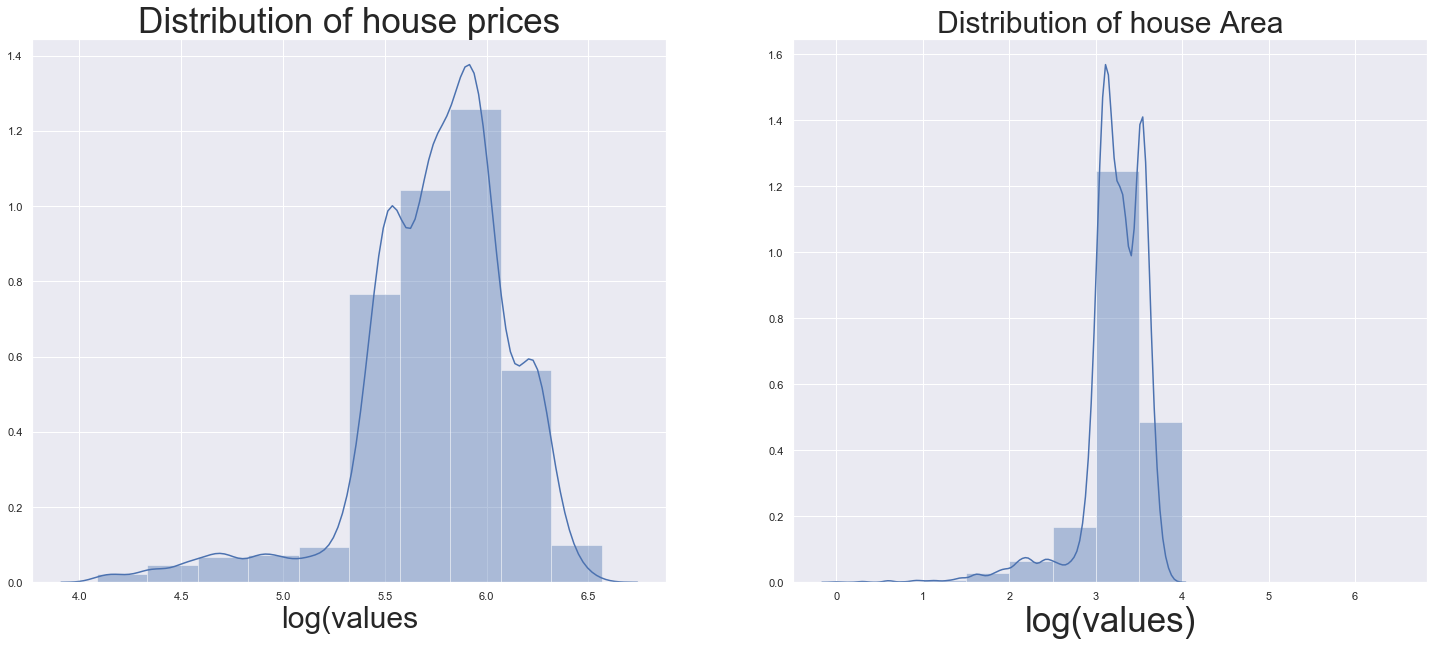

In [70]:
#sns.distplot for houseprice area and price
plt.figure(figsize = [25, 10])
plt.subplot(1, 2, 1)
log_data = np.log10(houseprice['price']) # direct data transform
log_bin_edges = np.arange(5, log_data.max()+0.5, 0.1)
sns.distplot(log_data, bins = 10)
plt.xlabel('log(values',fontsize=(30))
plt.title('Distribution of house prices',fontsize=(35))
plt.subplot(1,2,2)
log_data2 = np.log10(houseprice['area']) # direct data transform
log_bin_edges = np.arange(1, int(log_data.max()+1), 0.5)
sns.distplot(log_data2, bins =log_bin_edges)
plt.xlabel('log(values)',fontsize=(35))
plt.title('Distribution of house Area',fontsize=(30))
log_bin_edges

prices have an approximate unimodal distribution 

Area has unimodal distribution

Both the distribution of prices and area are skewed to the left 

# check for outliers in price and area
From the box plots both area and prices have outliers, any price value above 1600000 and area above 7000 are outliers

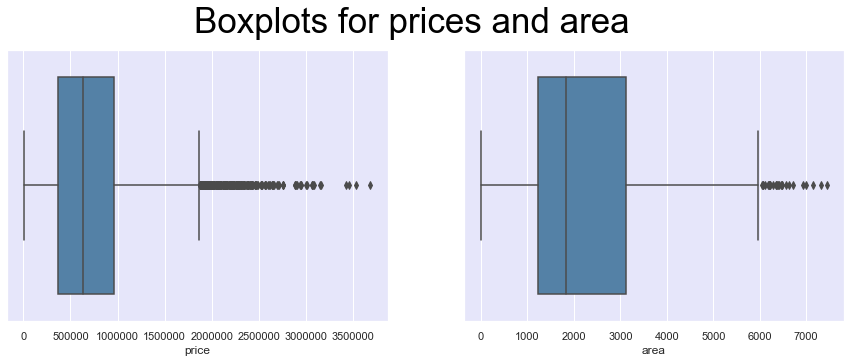

In [71]:
# Boxplots
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['price', 'area']
colors = ['steelblue','steelblue']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))
plt.suptitle('Boxplots for prices and area', fontsize = 35, y = 1, color = 'black')
for ax, data, column, color in zip(axes.flatten(), houseprice, col_list, colors):
  sns.boxplot(houseprice[column], ax = ax, color = color)
  ax.set_facecolor('lavender')# Setting the background color to lavender

In [72]:
# select high outliers, using criteria eyeballed from the plots
outliers = ((houseprice['price'] > 1600000)| (houseprice['area'] > 7000))
print(outliers.sum())
print(houseprice.loc[outliers,:])

573
      house_id neighborhood  area  bedrooms  bathrooms      style    price
1          491            B  3512         5          3  victorian  1744259
22         583            B  4456         7          4  victorian  2209887
28        7908            B  3335         5          3  victorian  1656998
30        5478            B  3509         5          3  victorian  1742780
39        7924            B  4620         6          4  victorian  2290655
...        ...          ...   ...       ...        ...        ...      ...
5992      3135            B  3532         5          3  victorian  1754119
5998      3767            B  3668         6          4  victorian  1821319
6004      5911            B  3580         6          4  victorian  1777935
6006      2472            B  3693         5          3  victorian  1833492
6018      1072            B  6201         7          4  victorian  3070172

[573 rows x 7 columns]


prices have approximate mean of 600000 while area is approximately 900

573 outliers detected for both the prices and area

# Total Counts of Bathroomscounts per house
Observing the counts on the plot reveals that most houses have 2 bathrooms which is an indication that 2 bathroomed houses are the most popular while 5 bathrooms per house have the lowest count indicating they are less popular

Text(0, 0.5, 'Total Counts')

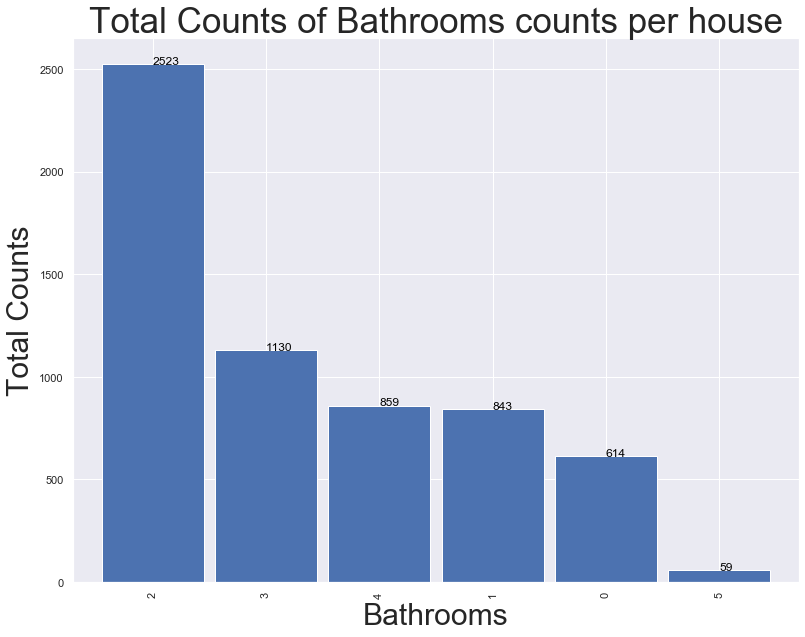

In [73]:
# countplot to for bathrooms
# plot to show the categories of house bedrooms
#counting the values per category
bathrooms = houseprice['bathrooms'].value_counts()
ax=bathrooms.plot.bar(width=.9) 
#for loop to iterative over the counts object
for i, v in bathrooms.reset_index().iterrows():
    ax.text(i, v.bathrooms + 0.5 , v.bathrooms, color='black')
plt.title('Total Counts of Bathrooms counts per house', fontsize=35)
plt.xlabel('Bathrooms',fontsize=(30))
plt.ylabel('Total Counts',fontsize=(30))

most houses have 2 bathrooms which shows they are the most popular
5 bathrooms per house have the lowes count indicating they are less popular

# Total Counts of Bedrooms  per house
Plotting the counts of houses with bedrooms from 0-8 reveals that majority houses 1367 of the total records from the dataset have 3 bedrooms indicating they are the most popular.However 8 bedroom houses have the lowest count of 59 records hence they are the least pupolar

Text(0, 0.5, 'Total Counts')

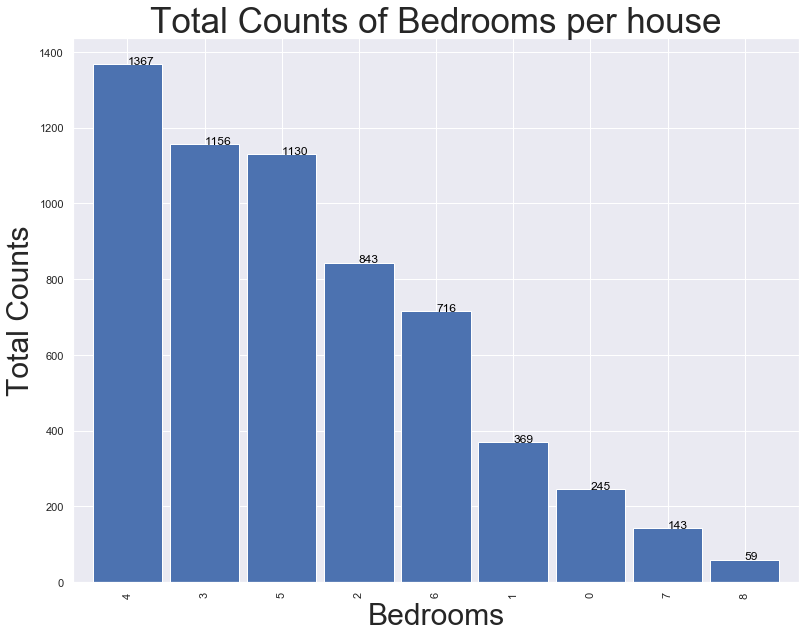

In [74]:
# plot to show the categories of house bedrooms
#counting the values per category
bedrooms = houseprice['bedrooms'].value_counts()
ax=bedrooms.plot.bar(width=.9) 
#for loop to iterative over the counts object
for i, v in bedrooms.reset_index().iterrows():
    ax.text(i, v.bedrooms + 0.2 , v.bedrooms, color='black')
plt.title('Total Counts of Bedrooms per house', fontsize=35)
plt.xlabel('Bedrooms',fontsize=(30))
plt.ylabel('Total Counts',fontsize=(30))

majority houses have 3 bedrooms indicating they are the most popular

8 bedroom houses have the lowest frequency hence they are the least pupolar

# Proportions of Styles
The tabulation of the house styles shows three main house styles, the Victorian Style is the most popular with the highest percentage approximately 50%,Ranch is the second most popular house styles with approximately 29.9% Lodge style is least popular accounting to approximately 20.4 %

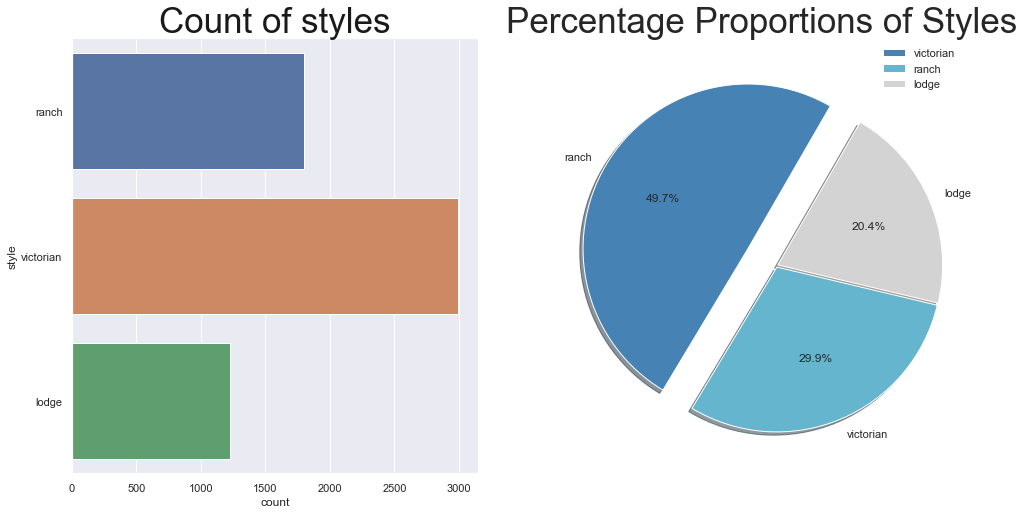

,Name of Style,Count,percent
0,victorian,2997,49.72
1,ranch,1802,29.89
2,lodge,1229,20.39


In [75]:
fig, ax = plt.subplots(1, 2,figsize=(16,8))
sns.countplot(y = houseprice['style'], ax=ax[0]).set_title('Count of styles',color='k',fontsize=(35))
labels=houseprice['style'].unique()
colors = ['steelblue','c','lightgrey']
plt.pie(houseprice['style'].value_counts(),labels = labels, colors=colors ,shadow = True,startangle=60, explode = (0.2, 0.01, 0.01), autopct = '%1.1f%%')
plt.axis('equal',fontsize=(30))
plt.title("Percentage Proportions of Styles",fontsize=(35))
plt.legend(labels=['victorian', 'ranch', 'lodge'])
plt.show()
#calculating the total percentage of our each neighborhood
Style = houseprice['style'].value_counts().to_frame().reset_index()
Style['percent'] = Style["style"].apply(lambda x : round(100*float(x) / len(houseprice), 2))
Style = Style.rename(columns = {"index" : "Name of Style", "style" : "Count"})
Style

Victorian Style is the most popular with the highest percentage approximately 50%,
Ranch is the second most popular house styles with approximately 29.9%,
Lodge style is least popular accounting to approximately 20.4 %

# Distribution of Neighborhood
The dataset has three neighborhoods, Neighborhood B is the most popular with the highest percentage representation at approximately 40.26%,Neighborhood A follows with approximately 31 % while Neighborhood C is the least popular with approximately 28.6%.

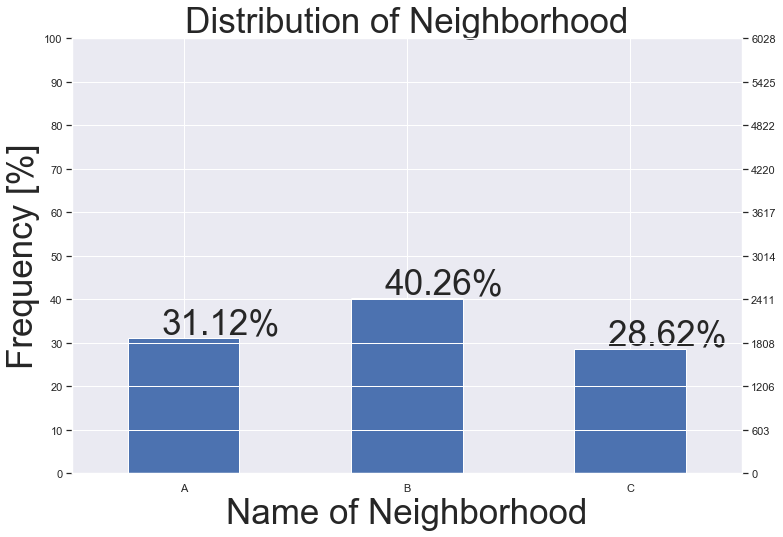

In [76]:
plt.figure(figsize=(12,8))
plt.title('Distribution of Neighborhood',fontsize=(35))
plt.xlabel('Name of Neighborhood',fontsize=(35))
plt.ylabel('Frequency [%]',fontsize=(35))

ax = (houseprice.neighborhood.value_counts()/len(houseprice)*100).sort_index().plot(kind="bar", rot=0)
ax.set_yticks(np.arange(0, 110, 10))

ax2 = ax.twinx()
ax2.set_yticks(np.arange(0, 110, 10)*len(houseprice)/100)

for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),fontsize=(35))

Neighborhood B is the most popular with the highest percentage representation at approximately 40.26%,Neighborhood A follows with approximately 31 % while Neighborhood C is the least popular with approximately 28.6%

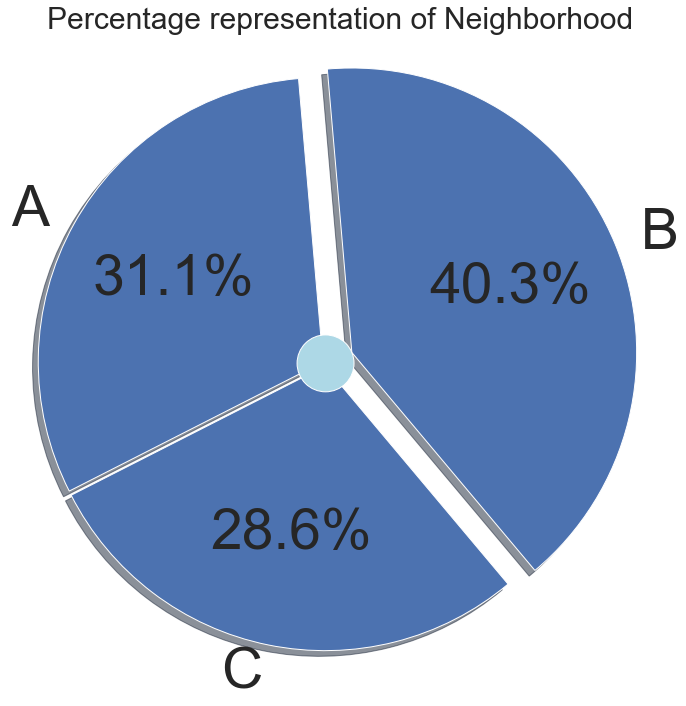

,Name of Neighborhood,Count,percent
0,B,2427,40.26
1,A,1876,31.12
2,C,1725,28.62


In [77]:
# create the plot
fig, ax = plt.subplots(figsize=(10,10))
labels=houseprice['neighborhood'].unique()
colors = ['b','b','b']
flavor_pie = ax.pie(houseprice['neighborhood'].value_counts(),labels=labels, autopct='%.1f%%', shadow=True, colors=colors, 
explode = (0.1, 0.01, 0.01), startangle= -50
                    , textprops={'fontsize':57})
centre_circle = plt.Circle((0,0),0.10,fc='lightblue')
plt.title('Percentage representation of Neighborhood',fontsize=30)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.tight_layout()
plt.show()

# calculating the total percentage of our each neighborhood
neigh = houseprice['neighborhood'].value_counts().to_frame().reset_index()
neigh['percent'] = neigh["neighborhood"].apply(lambda x : round(100*float(x) / len(houseprice), 2))
neigh = neigh.rename(columns = {"index" : "Name of Neighborhood", "neighborhood" : "Count"})
neigh


Neighborhood B has the highest prices across all the three house styles with victorian style having the highest prices, 

both B and C have the same prices in Neighborhoods A and C, lodge style has the lowest 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 
* prices have an approximate unimodal distribution 
* Area has unimodal distribution
* Both the distribution of prices and area are skewed to the left 
* prices have approximate mean of 600000 while area is approximately 900
* most houses have 2 bathrooms which shows they are the most popular
* 5 bathrooms per house have the lowes count indicating they are less popular
* majority houses have 3 bedrooms indicating they are the most popular
* 8 bedroom houses have the lowest frequency hence they are the least pupolar
* Victorian Style is the most popular with the highest percentage approximately 50%
* Ranch is the second most popular house styles with approximately 29.9%
* Lodge style is least popular accounting to approximately 20.4 %
* Neighborhood B is the most popular with the highest percentage representation at approximately 40.26%,Neighborhood A follows with approximately 31 % while Neighborhood C is the least popular with approximately 28.6%
* neighborhood B has the highest proportion of houses,while C has the lowest
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> 
* outliers detected for both the prices and area. Being a comparison of prices, these are still valid points because prices can overshoot depending on the other market dynamics

## Bivariate Exploration

> 

### 1.Quantitative Vs Quantitative:scatter plots/regplot

# price Vs Area
Observing the plot of price against area shows that there is a positive correlation between prices and area
high variablity in lower values

In [78]:
#transform the data data in x axis
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
#transform the data in y axis
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)

Text(0.5, 1.0, 'Regresion plot of price Vs Area')

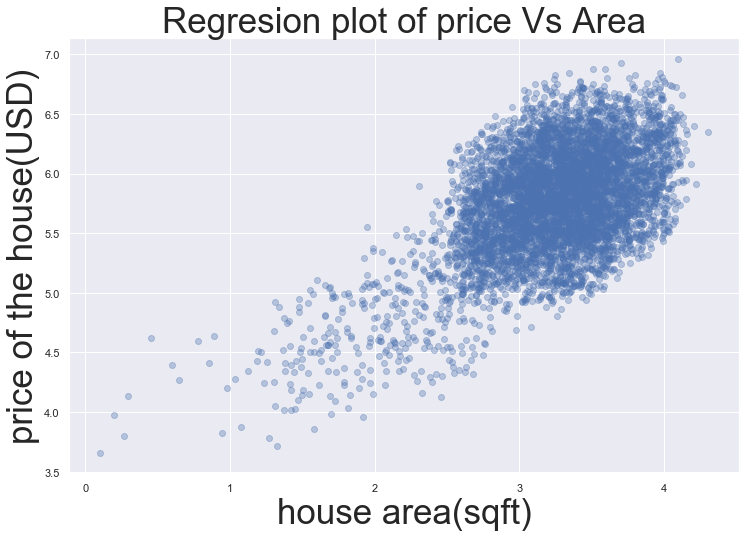

In [79]:
plt.figure(figsize = [12, 8])
#the x- and y- values sent to regplot are set directly as Series, extracted from the dataframe.
sns.regplot(data=houseprice,x=houseprice['area'].apply(log_trans),y= houseprice['price'].apply(log_trans),fit_reg=True,x_jitter = 0.5, y_jitter = 0.5, scatter_kws = {'alpha' : 1/3
})
#sns.regplot(data=houseprice,x= 'area',y= 'price',fit_reg=True)
plt.xlabel('house area(sqft)',fontsize=35)
plt.ylabel('price of the house(USD)',fontsize=35)
plt.title('Regresion plot of price Vs Area',fontsize=35)
#plt.subtitle('')

There is a positive correlation between prices and area. There is
high variablity in lower values

### 2.Quantitave Vs Qualitative:Violin plots

# Price versus bedrooms
The house prices increases with the increase int the number of bedrooms, with the 8 bedrooms having the highest price figure while 1 bedroom has the lowest.This is surprising because the houses with 0 bedroom have higher prices  compared to the 1 bedroom house

Text(0, 0.5, 'Prices')

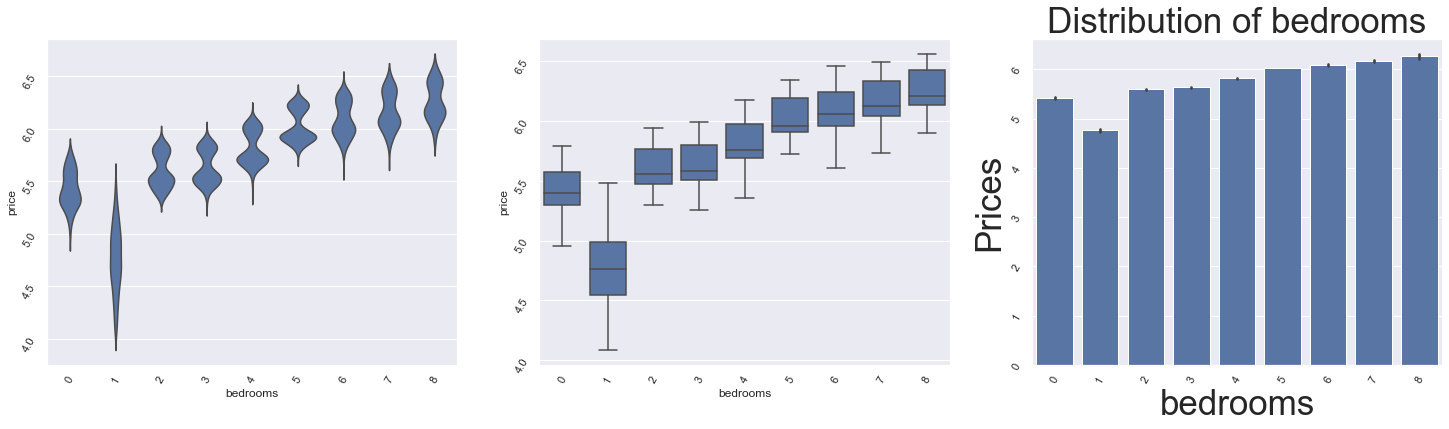

In [80]:
plt.figure(figsize = [25, 6])
base_color = sns.color_palette()[0]

#transform the data data in y axis
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)
# left plot: violin plot
plt.subplot(1, 3, 1)
sns.violinplot(data = houseprice, x = 'bedrooms', y= houseprice['price'].apply(log_trans), inner = None,
              color = base_color)
plt.xticks(rotation = 60) # include label rotation due to small subplot size
plt.yticks(rotation = 60)
# center plot: box plot
plt.subplot(1, 3, 2)
sns.boxplot(data = houseprice, x = 'bedrooms', y= houseprice['price'].apply(log_trans), color = base_color)
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sns.barplot(data = houseprice, x = 'bedrooms',y= houseprice['price'].apply(log_trans), color = base_color)
plt.xticks(rotation = 60)
plt.yticks(rotation = 60)
plt.title('Distribution of bedrooms',fontsize=(35))
plt.xlabel('bedrooms',fontsize=(35))
plt.ylabel('Prices',fontsize=(35))

1 bedroom houses have a wider distribution of  prices
8 bedroom houses have the highest average prices
houses with 0 bed room have higher average prices compared to houses with 1 bedroom
all houses with 2,3,4,5,6,7,8 have bimidal distribution of avarage prices

Text(661.7783333333334, 0.5, 'prices')

<Figure size 1080x360 with 0 Axes>

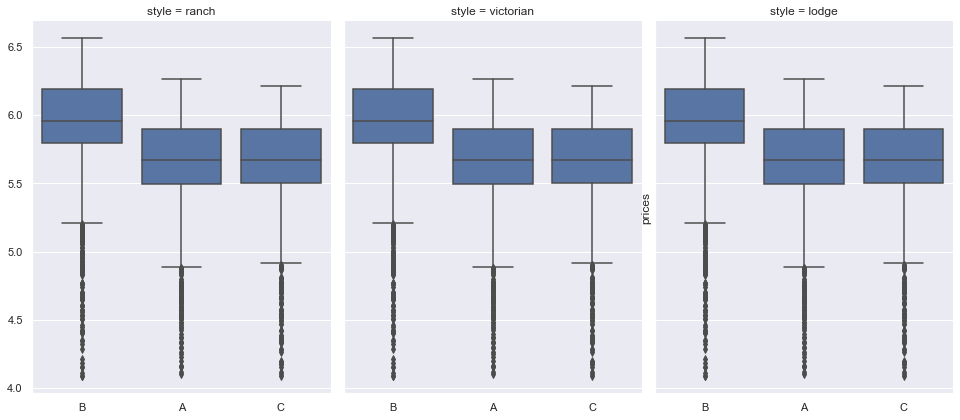

In [81]:
#Boxplots of the style against Neighborhood
plt.figure(figsize = [15, 5]);
#transform the data data in y axis
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)
g = sns.FacetGrid(data = houseprice, col = 'style', height=6,aspect=0.75,margin_titles = True);
g.map(sns.boxplot, x=houseprice['neighborhood'], y= houseprice['price'].apply(log_trans),order=None);
plt.ylabel('prices')
#plt.title('Boxplots of the style against Neighborhood',fontsize=25)

## all prices have outliers when compared to house styles

### 3.Qualitative Vs Qualitative:clustered bar charts

# Distribution of Bedrooms Vs Neighborhood
The number of bedrooms per house has a normal distribution in all neighborhoods, 4 bedroomed houses have the highest frequency in every neighborhood 8 bedroom house has the lowest frequency in all neighborhoods

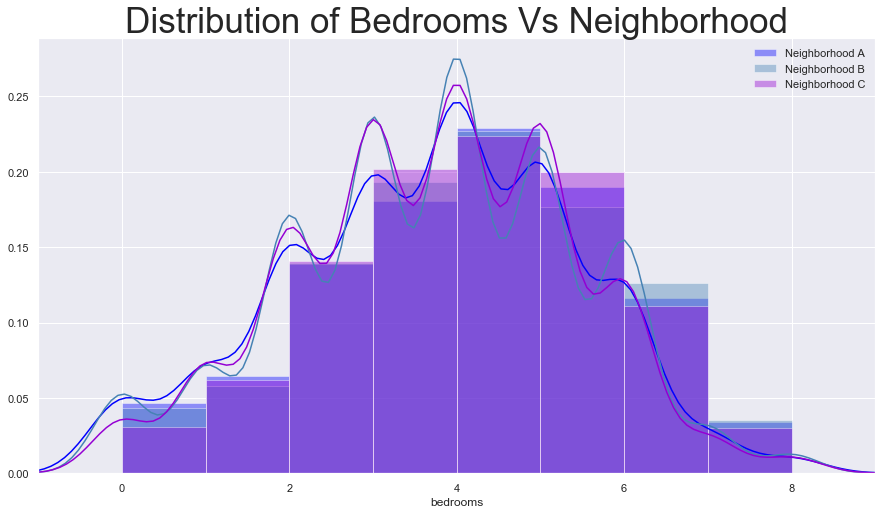

In [82]:
# density plot to show the distribution of the number of bedrooms per house in each neighborhood
plt.figure(figsize=(15,8))
sns.distplot(houseprice[houseprice['neighborhood'] == "A"]['bedrooms'], color='blue',bins =8)
sns.distplot(houseprice[houseprice['neighborhood'] == "B"]['bedrooms'], color='steelblue',bins =8)
sns.distplot(houseprice[houseprice['neighborhood'] == "C"]['bedrooms'], color='darkviolet',bins =8)
plt.title('Distribution of Bedrooms Vs Neighborhood', fontsize=35)
plt.legend(labels=['Neighborhood A', 'Neighborhood B', 'Neighborhood C'])
plt.xlim([-1,9])
plt.show()

 The number of bedrooms per house has a normal distribution in all neighborhoods

4 bedroomed houses have the highest frequency in every neighborhood

8 bedroom house has the lowest frequency in all neighborhoods

# Distribution of styles against Neighborhood
Neighborhood B has the highest proportion for all the styles while has the lowest,Victorian style has the highest highest representation while lodge has the lowest representation

Text(0, 0.5, 'Count of styles')

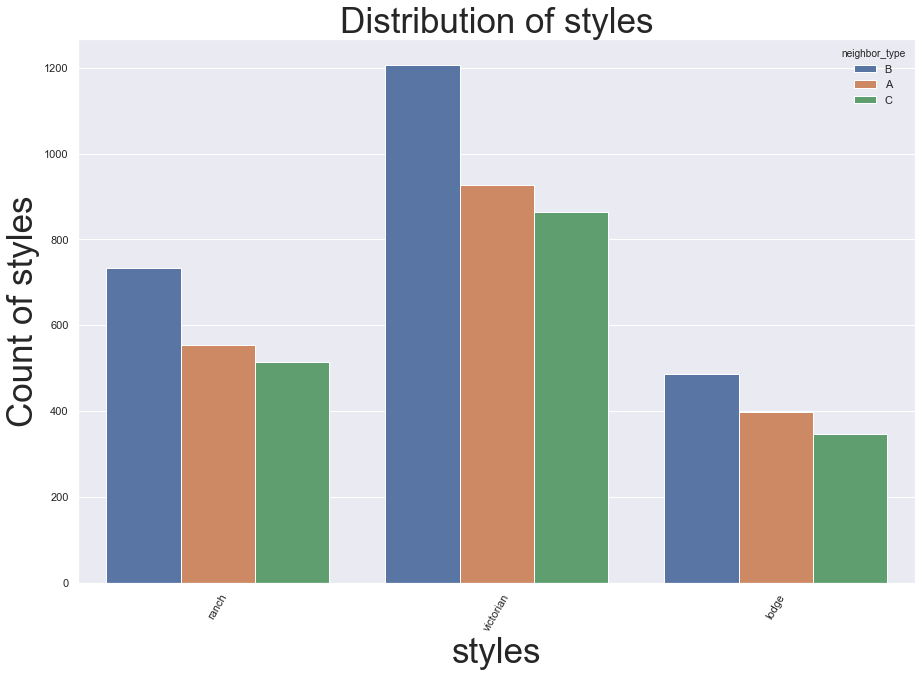

In [83]:
houseprice['neighbor_type']=houseprice['neighborhood'].apply(lambda x: x.split()[0])
style_counts=houseprice.groupby(['style','neighborhood']).size()
style_counts=style_counts.reset_index(name='count')
style_counts.pivot(index='style',columns='neighborhood',values='count')
style_counts.isna().sum()
plt.figure(figsize = [15, 10]);
sns.countplot(data=houseprice,x='style',hue='neighbor_type')
plt.xticks(rotation=60)
plt.title('Distribution of styles',fontsize=35)
plt.xlabel('styles',fontsize=35)
plt.ylabel('Count of styles',fontsize=35)

Neighborhood B has the highest proportion for all the styles while has the lowest,
Victorian style has the highest highest representation while lodge has the lowest representation

# Distribution of bedrooms against Style

observations of the bedrooms reveals that:

* Ranch:has 2,3,4,5 bedrooms  highest proportion is 3 bedroom while lowes is 5 bedrooms

* Lodge:has 0,1,2,3,4 bedrooms  highest proportion is 2 bedroom while lowes is 4 bedrooms

* victorian: has 2,3,4,5,6,7 bedrooms  highest proportion is 5 bedroom while lowes is 2 bedrooms

Tabulation of the number of bedrooms per style


bedrooms,style,0,1,2,3,4,5,6,7,8
0,lodge,245.0,369.0,460.0,118.0,37.0,0.0,0.0,0.0,0.0
1,ranch,0.0,0.0,350.0,730.0,645.0,77.0,0.0,0.0,0.0
2,victorian,0.0,0.0,33.0,308.0,685.0,1053.0,716.0,143.0,59.0


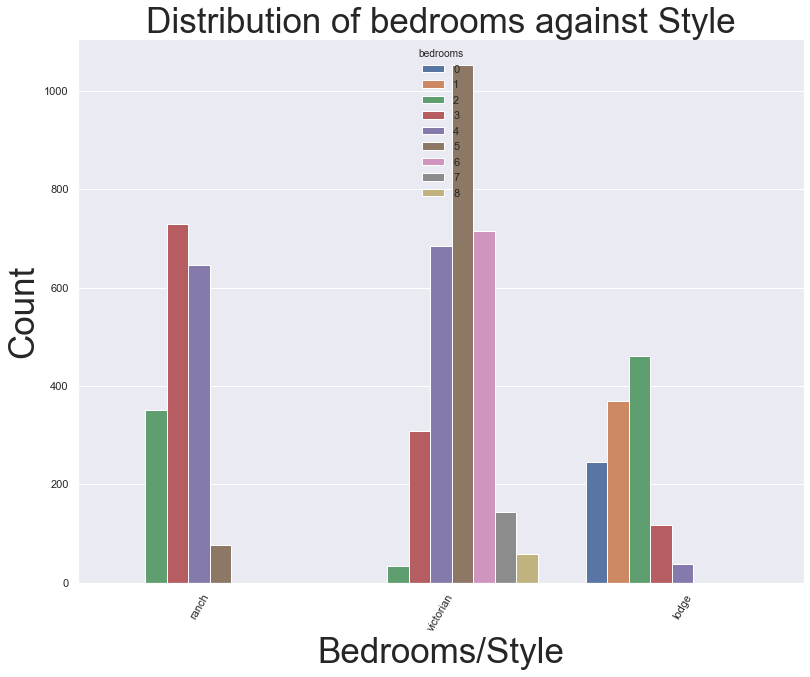

In [84]:
sns.countplot(data=houseprice,x='style',hue='bedrooms')
plt.xticks(rotation=60)
plt.title('Distribution of bedrooms against Style',fontsize=(35))
plt.xlabel('Bedrooms/Style',fontsize=35)
plt.ylabel('Count',fontsize=35)
plt.rcParams["figure.figsize"] = 20, 10
locs = ["upper left"]
ax.legend(loc=3, bbox_to_anchor=(0.8,0.6))

#Tabulation of the number of bedrooms per style
print('Tabulation of the number of bedrooms per style')
bedrooms_counts=houseprice.groupby(['style','bedrooms']).size()
bedrooms_counts=bedrooms_counts.reset_index(name='count')
bedrooms_counts=bedrooms_counts.pivot(index='style',columns='bedrooms',values='count').fillna(0).reset_index()
bedrooms_counts

ranch:has 2,3,4,5 bedrooms  highest proportion is 3 bedroom while lowes is 5 bedrooms,
Lodge:has 0,1,2,3,4 bedrooms  highest proportion is 2 bedroom while lowes is 4 bedrooms,
victrian: has 2,3,4,5,6,7 bedrooms  highest proportion is 5 bedroom while lowes is 2 bedrooms 

# Number of bathrooms per style

It is intersting to observe the bathrroms data because it almost portrays a similar. 
ranch: has 1,2,3 bathrooms  highest proportion is 2 bathrooms while lowes is 1 bathrooms, 
Lodge:has  1,2,3,4,5 bathrooms  highest proportion is 3 bathrooms while lowes is 1 bathrooms ,
victrian: has 0,1,2 bathrooms  highest proportion is 0 bathrooms while lowes is 2 bathrooms



Tabulation of the number of bathrooms per style


bathrooms,style,0,1,2,3,4,5
0,lodge,614.0,460.0,155.0,0.0,0.0,0.0
1,ranch,0.0,350.0,1375.0,77.0,0.0,0.0
2,victorian,0.0,33.0,993.0,1053.0,859.0,59.0


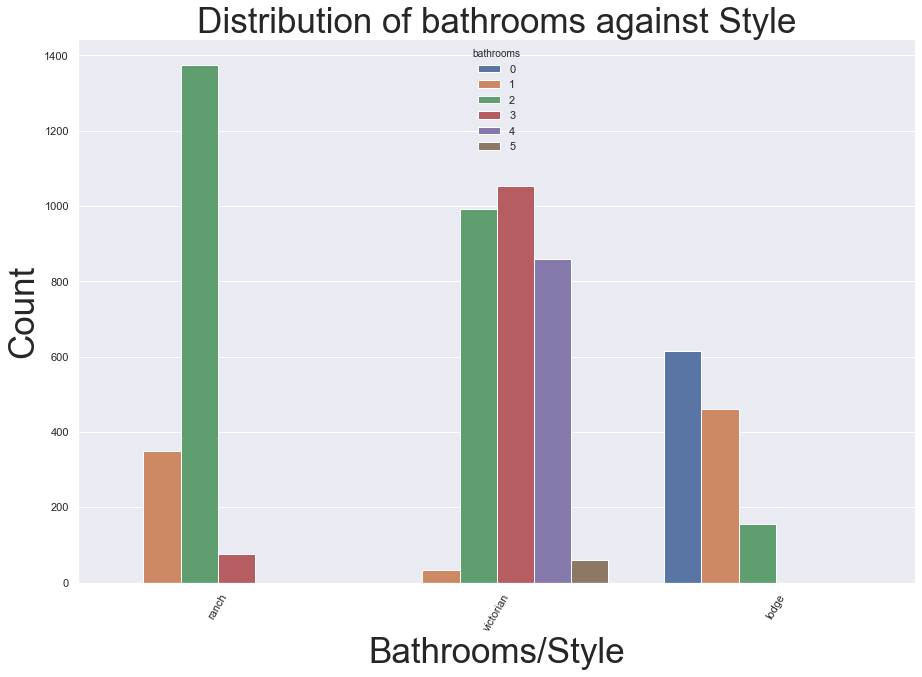

In [85]:
#countplot of bathrooms per house style 
plt.figure(figsize = [15, 10]);
sns.countplot(data=houseprice,x='style',hue='bathrooms')
plt.xticks(rotation=60)
plt.title('Distribution of bathrooms against Style',fontsize=(35))
plt.xlabel('Bathrooms/Style',fontsize=35)
plt.ylabel('Count',fontsize=35)

#
print()
print()
#Tabulation of the number of bedrooms per style
print('Tabulation of the number of bathrooms per style')
bathrooms_counts=houseprice.groupby(['style','bathrooms']).size()
bathrooms_counts=bathrooms_counts.reset_index(name='count')
bathrooms_counts=bathrooms_counts.pivot(index='style',columns='bathrooms',values='count').fillna(0).reset_index()
bathrooms_counts

 ranch: has 1,2,3 bathrooms  highest proportion is 2 bathrooms while lowes is 1 bathrooms 
 Lodge:has  1,2,3,4,5 bathrooms  highest proportion is 3 bathrooms while lowes is 1 bathrooms 
 victrian: has 0,1,2 bathrooms  highest proportion is 0 bathrooms while lowes is 2 bathrooms

# heatmap to check correlation amongst the variables
High correlation between area,bathrooms,bedrooms, and price

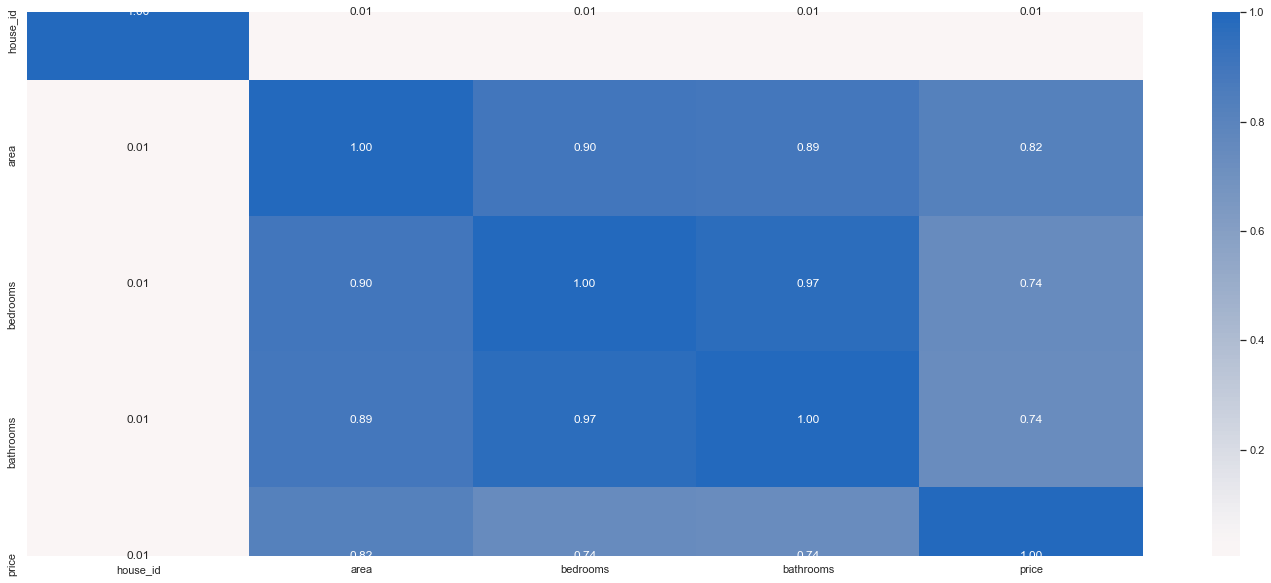

In [86]:
plt.figure(figsize = [25, 10])
sns.heatmap(houseprice.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

**High** correlation between area,bathrooms,bedrooms, and price

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>
* The number of bedrooms per house has a normal distribution in all neighborhoods
* 4 bedroomed houses have the highest frequency in every neighborhood
* 8 bedroom house has the lowest frequency in all neighborhoods
* There is a positive correlation between prices and area
* high variablity in lower values
* 1 bedroom houses have a wider distribution of  prices
* 8 bedroom houses have the highest average prices
* houses with 0 bed room have higher average prices compared to houses with 1 bedroom
* all houses with 2,3,4,5,6,7,8 have bimidal distribution of average prices
* all prices have outliers when compared to house styles
* The increase in price is directly proportional to both the increase in area and increase in the number of  bedrooms
* Ranch: has 2,3,4,5 bedrooms  highest proportion is 3 bedroom while lowest is 5 bedrooms
* Lodge:has 0,1,2,3,4 bedrooms  highest proportion is 2 bedroom while lowest is 4 bedrooms
* victrian:has 2,3,4,5,6,7 bedrooms  highest proportion is 5 bedroom while lowes is 2 bedrooms 
* Ranch:has 2,3,4,5 bedrooms  highest proportion is 3 bedroom while lowest is 5 bedrooms
* Lodge:has 0,1,2,3,4 bedrooms  highest proportion is 2 bedroom while lowest is 4 bedrooms
* victrian:** has 2,3,4,5,6,7 bedrooms  highest proportion is 5 bedroom while lowes is 2 bedrooms 
* Ranch: has 1,2,3 bathrooms  highest proportion is 2 bathrooms while lowest is 1 bathrooms 
* Lodge:has  1,2,3,4,5 bathrooms  highest proportion is 3 bathrooms while lowes is 1 bathrooms 
* victrian: has 0,1,2 bathrooms  highest proportion is 0 bathrooms while lowest is 2 bathrooms

# Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>
* houses with 0 bed room have higher average prices compared to houses with 1 bedroom
* Neighborhood B has the highest proportion for all the styles while has the lowest,Victorian style has the highest highest representation while lodge has the lowest representation
* 4 bedroomed houses have the highest frequency in every neighborhood
* victrian: has 0,1,2 bathrooms  highest proportion is 0 bathrooms while lowest is 2 bathrooms

## Multivariate Exploration
>

# Comparison of price/area  against Number of bedrooms
The increase in price is directly proportional to both the increase in area and increase in the number of  bedrooms

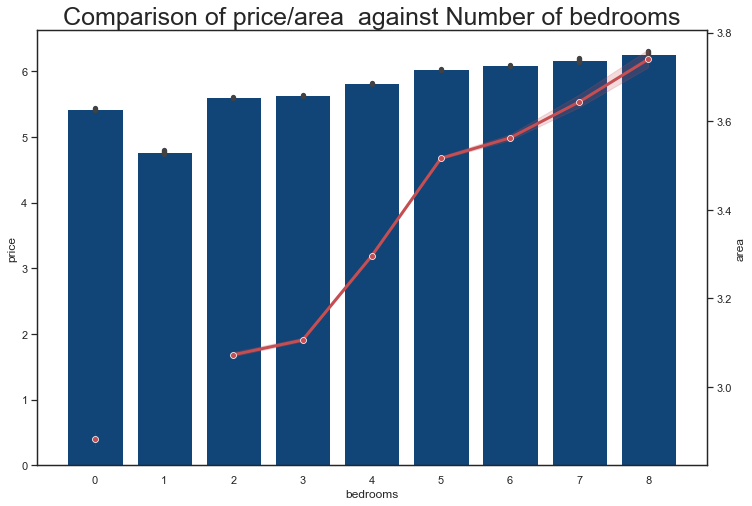

In [87]:
#cobined barplot/line plot for the price and area compared with numbers of bedrooms
sns.set(style="white", rc={"lines.linewidth": 3})
#transform the data data in y axis
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()
sns.barplot(x=houseprice['bedrooms'],
            y=houseprice['price'].apply(log_trans), 
            color='#004488',
            ax=ax1)
sns.lineplot(x=houseprice['bedrooms'], 
             y=houseprice['area'].apply(log_trans),
             color='r',
             marker="o",
             ax=ax2)
plt.title('Comparison of price/area  against Number of bedrooms',fontsize=25)
plt.show()
sns.set()

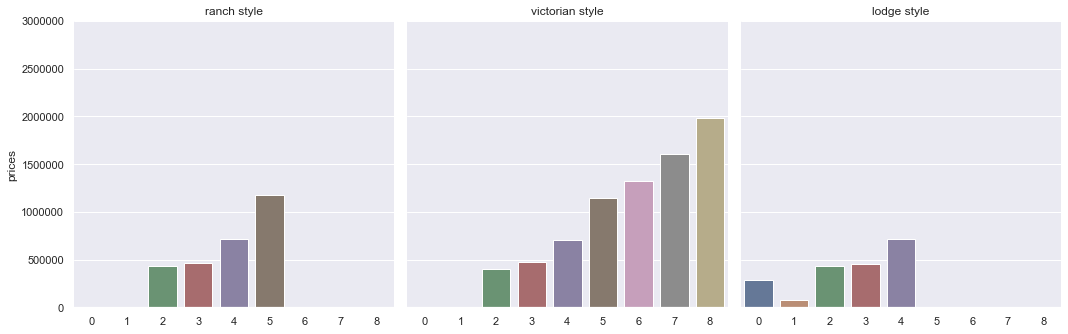

In [88]:
## Victorian Style has the highest prices with 2,3,4,5,6,7 and 8 bedroom houses,
## Ranch style has 2,3,4 and 5 bedroom houses only with 5 bedroom house having the highest prices 
## Lodge style has 0,1,2,3 and 4 bedrooms houses with 4 bedroom houses having the highest prices, 0 bedrooms houses have higher prices compared to 1 bedroom
#Catplot of price against bedrooms/style
g = sns.catplot(x="bedrooms", y="price", col="style",
                data=houseprice, saturation=.5,
                kind="bar", ci=None, aspect=1)
(g.set_axis_labels("", "prices")
  .set_xticklabels(["0","1", "2", "3","4", "5", "6","7", "8"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 3000000))
  .despine(left=True)) 

<Figure size 1440x576 with 0 Axes>

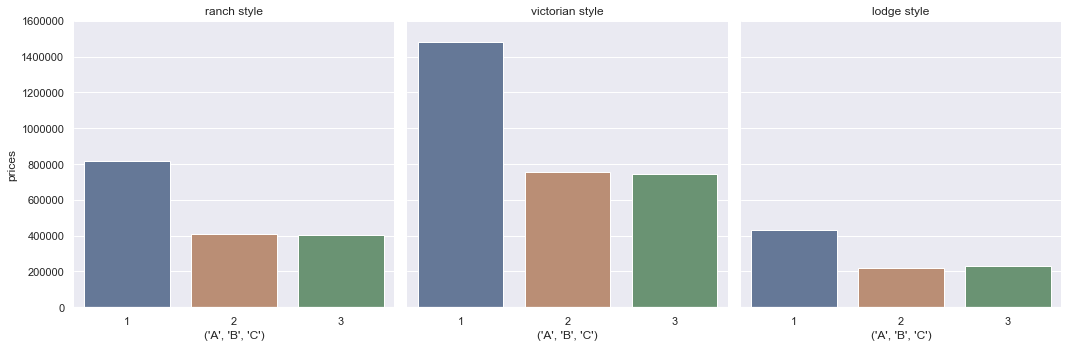

In [89]:
#catplot of Price variation against style and Neighborhood
plt.figure(figsize=(20,8))
g = sns.catplot(x="neighborhood", y="price", col="style",legend=True,
                data=houseprice, saturation=.5,
                kind="bar", ci=None, aspect=1)
(g.set_axis_labels(('A','B','C'), "prices")
  .set_xticklabels(["1", "2", "3"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1600000))
  .despine(left=True))

# Regresion plot of price Vs Area
There is a strong positive correlation between price,style and area in all the three neighbohood 

<Figure size 1800x720 with 0 Axes>

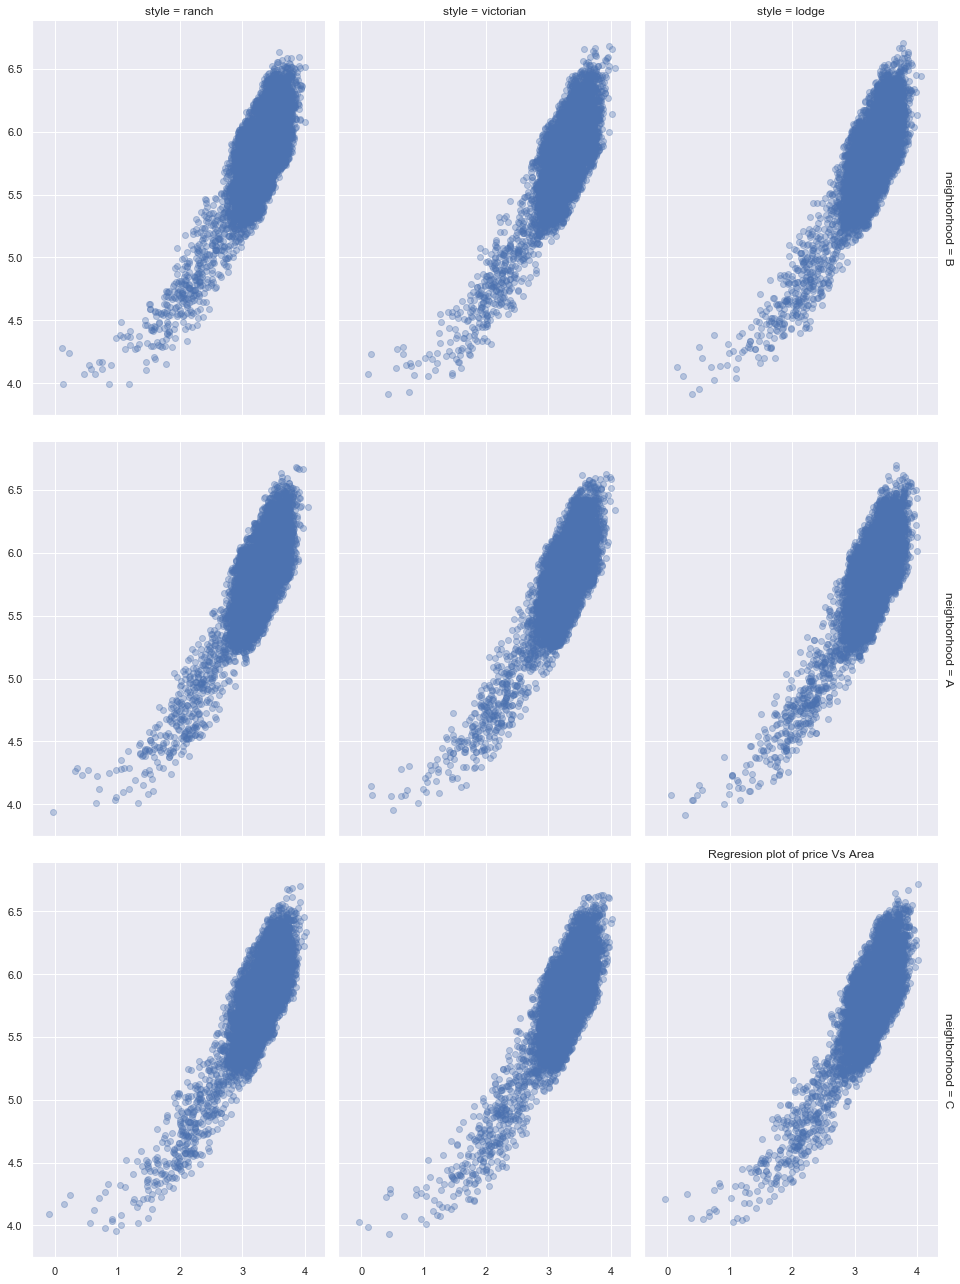

In [90]:
plt.figure(figsize = [25, 10])
#transform the data data in x axis
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)
#transform the data data in y axis
def log_trans(y, inverse = False):
    if not inverse:
        return np.log10(y)
    else:
        return np.power(10, y)

g = sns.FacetGrid(data = houseprice, col = 'style', row = 'neighborhood',height=6,aspect=0.75,margin_titles = True)
plt.xlabel('house area(sqft)')
plt.ylabel('price of the house(USD)')
plt.title('Regresion plot of price Vs Area')
g.map(sns.regplot,data = houseprice,x=houseprice['area'].apply(log_trans), y= houseprice['price'].apply(log_trans),x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3
})

There is a strong positive correlation between price,style and area in all the three neighbohood 

# Combined Price/Area Vs  neighborhood,  bedrooms, bathrooms, and style

Similarities in the distributions  between neighborhood and style against both price/area with prices being lower than 1000000
Bathrooms and bedrooms have similar spread in both prices and area an indication that price is determined by bedrooms,bathrooms and area

<Figure size 2880x720 with 0 Axes>

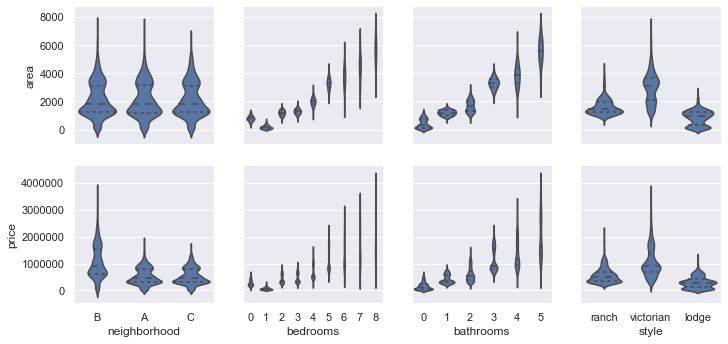

In [91]:
plt.figure(figsize = [40, 10])
g = sns.PairGrid(data = houseprice, x_vars = [ 'neighborhood',  'bedrooms', 'bathrooms', 'style',
        ],
                y_vars = ['area','price'])
g.map(sns.violinplot, inner = 'quartile')

Similarities in the distributions  between neighborhood and style against both price/area with prices being lower than 1000000
Bathrooms and bedrooms have similar spread in both prices and area an indication that price is determined by bedrooms,bathrooms and area

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>
* There is a strong positive correlation between price,style and area in all the three neighbohood 
* High correlation between area,bathrooms,bedrooms, and price
* Similarities in the distributions  between neighborhood and style against both price/area with prices being lower than 1000000
* bathrooms and bedrooms have similar spread in both prices and area an indication that price is determined by bedrooms,bathrooms and area

### Were there any interesting or surprising interactions between features?

> Exciting interraction is evident between bedrooms of type 1 and prices


# References
* 1.https://julienbeaulieu.gitbook.io/wiki/sciences/programming/data-analysis/data-visualization/univariate-exploration-of-data/bar-chart
* 2.https://www.darkhorseanalytics.com/blog/data-looks-better-naked
* 3.https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html
* 4.http://dataviztalk.blogspot.com/2016/02/how-to-add-jitter-to-plot-using-pythons.html
* 5.https://socviz.co/gettingstarted.html
* 6.http://yunus.hacettepe.edu.tr/~burkay.genc/courses/pss707_eda/ggplot/ggplot.html#introduction
* 7.http://cs-tklab.na-inet.jp/~tkouya/python/scipy-lectures/intro/matplotlib/matplotlib.html
* 8.https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

jupyter nbconvert exploration_house_price_2.ipynb --to slides --post serve

jupyter nbconvert exploration_house_price_2.ipynb --to slides --post serve
jupyter nbconvert exploration_house_price 2.ipynb --to slides --post serve

jupyter nbconvert exploration_house_price_2.ipynb --to slides --template output_toggle.tpl--post serve

jupyter nbconvert exploration_house_price_2.ipynb --to slides --template output_toggle2.tpl--post serve
jupyter nbconvert presentation.ipynb --to slides --template output-toggle.tpl--post serve
jupyter-nbconvert exploration_house_price_2.ipynb --to slides



 jupyter nbconvert --to html --template output_toggle exploration_house_price_2.ipynb

jupyter nbconvert exploration_house_price_2.ipynb --to slides --post serve



jupyter nbconvert House_Prices _Data_Exploration_Report.ipynb --to slides --post serve --template output_toggle



jupyter nbconvert exploration_house_price_2.ipynb --to slides --post serve --template output_toggle

jupyter nbconvert House_Prices _Data_Exploration_Report.ipynb --to slides --post serve --template output_toggle


\Desktop\Udacity\project5\project\data-3\data>
